In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from ClusterModel import model
from ClusterTools import cluster_profile
from ClusterTools import cluster_spectra
from ClusterTools import cluster_spectra_kafexhiu2014

dict_base = {'font.size':        16, 
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15, # Ensure enough space on the left so that all plot can be aligned
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
clust = model.Cluster()

                      ___   __    ___   __   __                      
                     / __) / _\  / __) /  \ (  )                     
                    ( (__ /    \( (_ \(  O )/ (_/\                   
                     \___)\_/\_/ \___/ \__/ \____/                   
   Cluster Atmosphere modeling for Gamma-ray Observations Libraries  
---------------------------------------------------------------------
                                                                     
Setting gNFW Planck coll. (2013) UPP.


In [3]:
clust.get_gamma_ray_rate()

AttributeError: 'numpy.ndarray' object has no attribute 'to_value'

(50, 100)

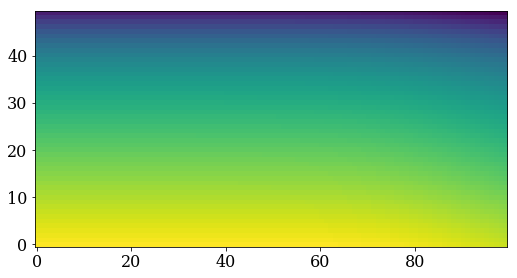

In [45]:
x = np.logspace(0,3, 100)
y = np.logspace(0, 3, 50)
v1 = cluster_profile.beta_model(x, 1, 200, 0.5)
v2 = cluster_spectra.exponentialcutoffpowerlaw_model(y, 1.0, 2.5, 1e2)

v = (np.tile(v1, [len(y),1])) * (np.tile(v2, [len(x),1])).T

plt.imshow(np.log10(v), origin='lower')
v.shape

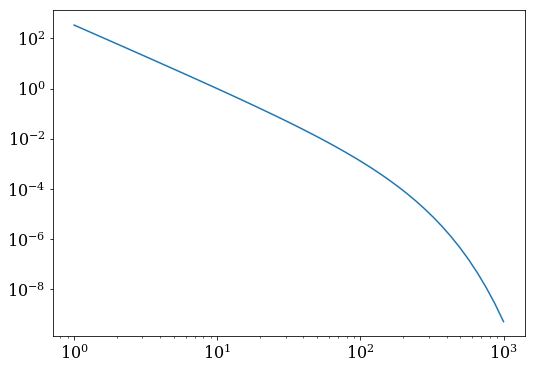

In [47]:
plt.loglog(y, trapz_loglog(v, x, axis=1, intervals=False))

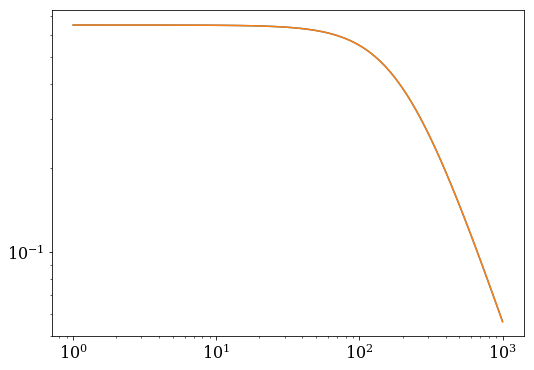

In [52]:
plt.loglog(x, trapz_loglog(v, y, axis=0, intervals=False))
plt.loglog(x,v1 * trapz_loglog(v2, y, axis=-1, intervals=False))